In [40]:
# importing libraries and setting alias for easy using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



In [22]:
from pandas import read_csv
# a function that takes filepath as string and returns the data included
def load_boston_data(filepath: str) -> pd.DataFrame:
    # setting the names of data coloumns
    coloumn_names = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
    data = read_csv(filepath, header=None, skiprows=22, names =coloumn_names, sep="\s+")
    data_1 = pd.DataFrame(data=data)
    for it in range(len(data_1)-1):  
        # Testing if the any element is NAN (np.isnan) for example if B == NAN replace B with CRIM at the next row and LSTAT with ZN of the row after, MEDV with INDUS next row
        if np.isnan(data_1["B"][it]):   
            data_1.B[it] = data_1.CRIM[it+1]
            data_1.LSTAT[it] = data_1.ZN[it+1]
            data_1.MEDV[it] = data_1.INDUS[it+1]
    # removing the rows that contains NULL values
    data_1 = data_1.dropna() 
    data_1.reset_index(drop = True, inplace =True)
    return data_1
data_1 = load_boston_data('boston.csv')
# print  10 rows of data
data_1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [30]:
data_1.describe() # show the data description that stored in Data Frame.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
data_1.shape

(506, 14)

In [24]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


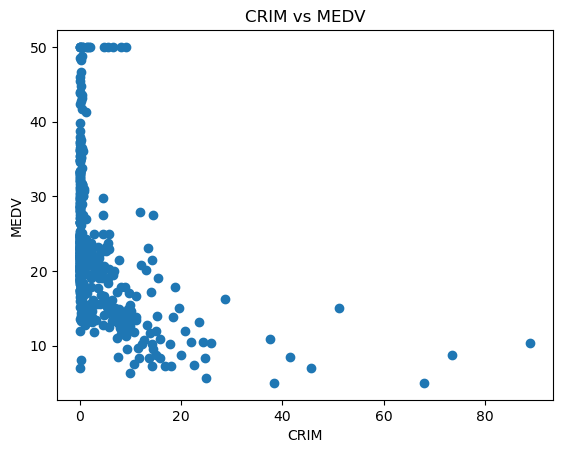

In [4]:
plt.scatter(data_1.CRIM,data_1.MEDV)#plotting data between CRIM and MEDV
plt.title("CRIM vs MEDV")
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()

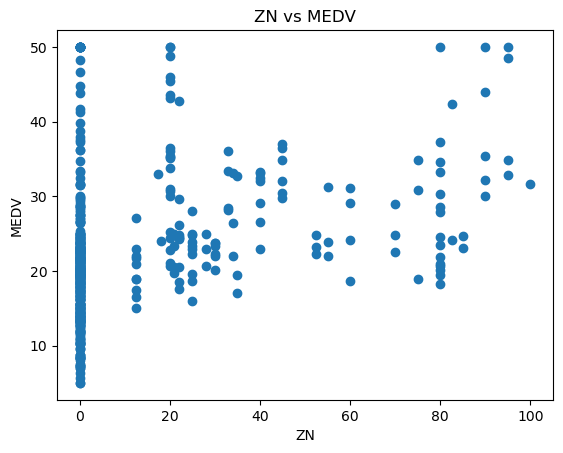

In [5]:
plt.scatter(data_1.ZN,data_1.MEDV)#plotting data between ZN and MEDV
plt.title("ZN vs MEDV")
plt.xlabel("ZN")
plt.ylabel("MEDV")
plt.show()

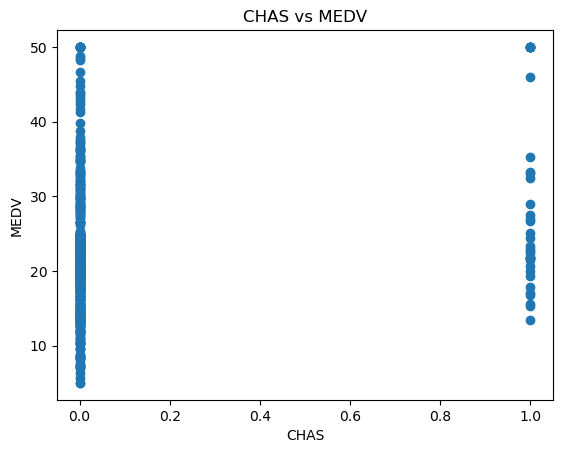

In [6]:
plt.scatter(data_1.CHAS,data_1.MEDV)#plotting data between CHAS and MEDV
plt.title("CHAS vs MEDV")
plt.xlabel("CHAS")
plt.ylabel("MEDV")
plt.show()

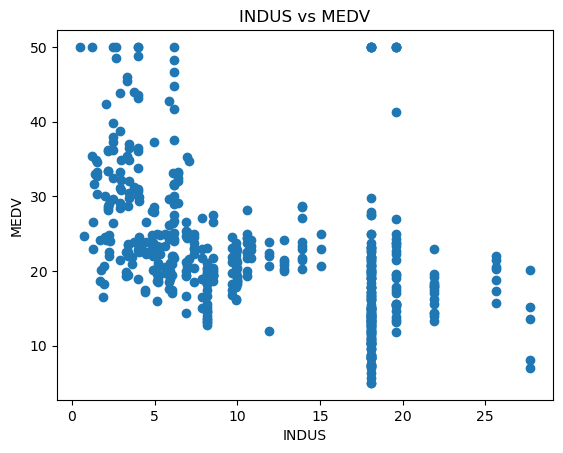

In [7]:
plt.scatter(data_1.INDUS,data_1.MEDV)#plotting data between INDUS and MEDV
plt.title("INDUS vs MEDV")
plt.xlabel("INDUS")
plt.ylabel("MEDV")
plt.show()

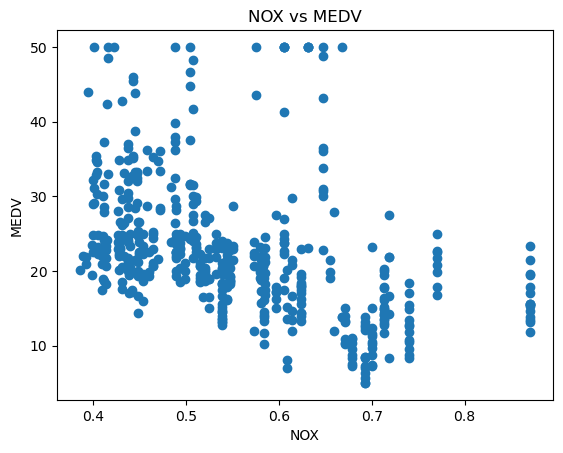

In [8]:
plt.scatter(data_1.NOX,data_1.MEDV)#plotting data between NOX and MEDV
plt.title("NOX vs MEDV")
plt.xlabel("NOX")
plt.ylabel("MEDV")
plt.show()

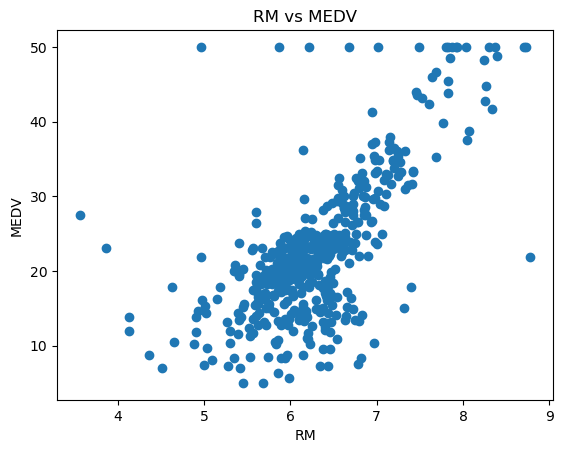

In [9]:
plt.scatter(data_1.RM,data_1.MEDV)#plotting data between RM and MEDV, , I will use this graph as RM is increasing linearly positively with MEDV
plt.title("RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

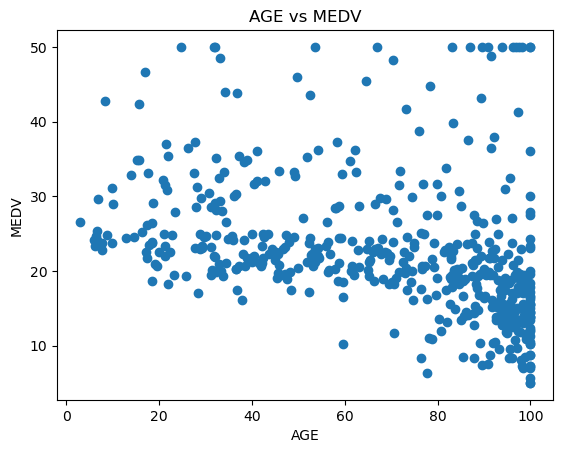

In [10]:
plt.scatter(data_1.AGE,data_1.MEDV)#plotting data between AGE and MEDV
plt.title("AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.show()

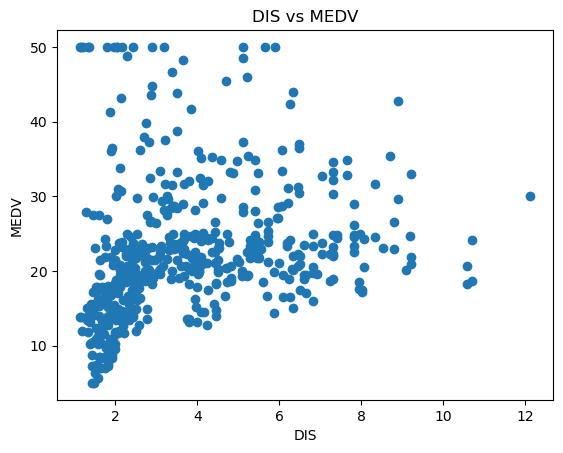

In [11]:
plt.scatter(data_1.DIS,data_1.MEDV)#plotting data between DIS and MEDV
plt.title("DIS vs MEDV")
plt.xlabel("DIS")
plt.ylabel("MEDV")
plt.show()

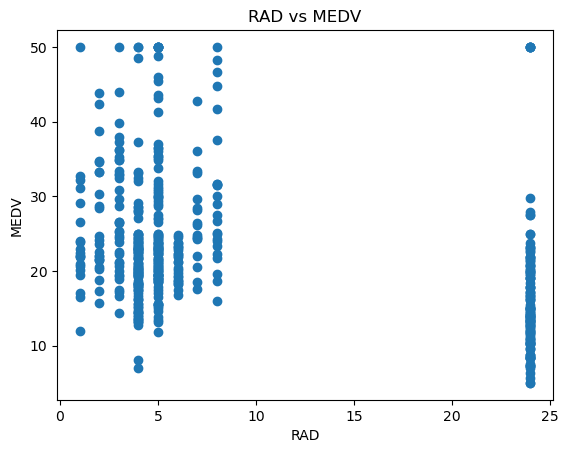

In [12]:
plt.scatter(data_1.RAD,data_1.MEDV)#plotting data between RAD and MEDV
plt.title("RAD vs MEDV")
plt.xlabel("RAD")
plt.ylabel("MEDV")
plt.show()

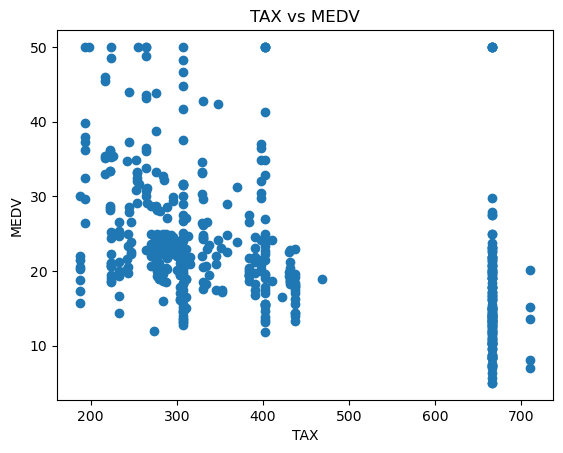

In [13]:
plt.scatter(data_1.TAX,data_1.MEDV)#plotting data between TAX and MEDV
plt.title("TAX vs MEDV")
plt.xlabel("TAX")
plt.ylabel("MEDV")
plt.show()

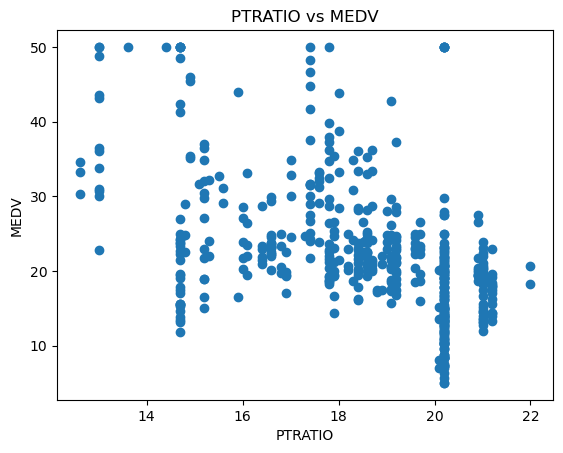

In [14]:
plt.scatter(data_1.PTRATIO,data_1.MEDV)#plotting data between PTRATIO and MEDV
plt.title("PTRATIO vs MEDV")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.show()

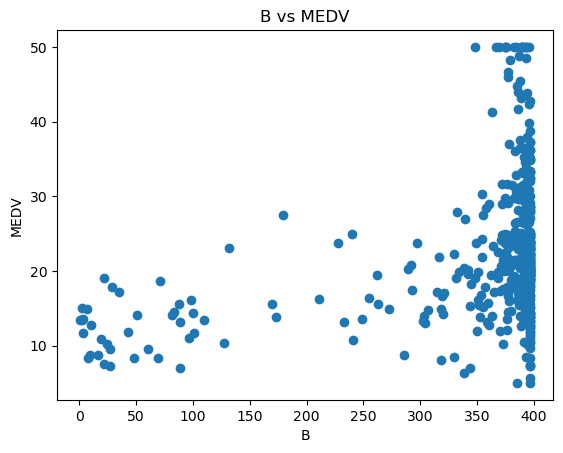

In [15]:
plt.scatter(data_1.B,data_1.MEDV) #plotting data between B and MEDV
plt.title("B vs MEDV")
plt.xlabel("B")
plt.ylabel("MEDV")
plt.show()

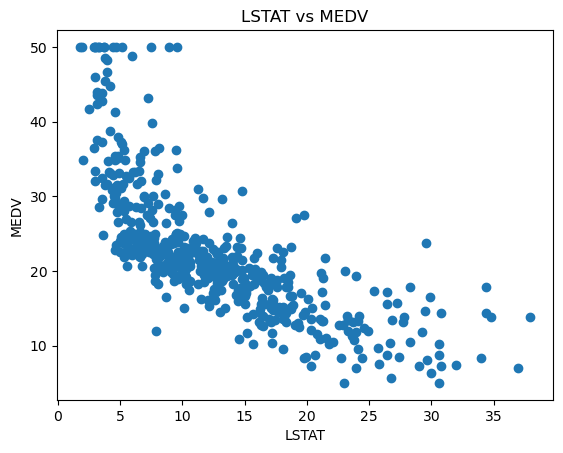

In [16]:
plt.scatter(data_1.LSTAT,data_1.MEDV) #plotting data between LSTAT and MEDV, I will use this graph as LSTAT is decreasing linearly proprtionally with MDEV
plt.title("LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

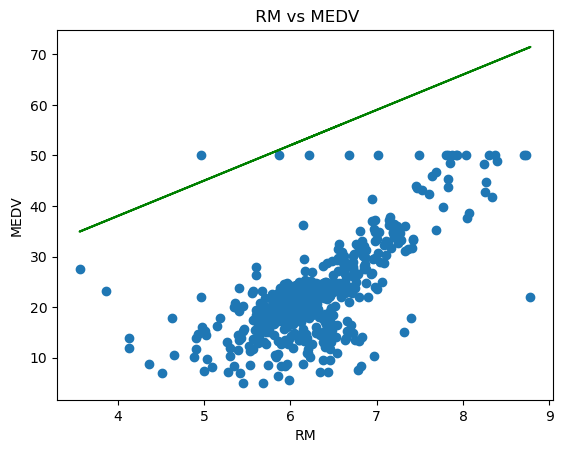

In [35]:
x =data_1.RM # I will choose LSTAT as X, LSTAT is the lower status of the population
y = data_1.MEDV # I will choose MEDV as Y, where MEDV is the Median value of owner-occupied homes in $1000's

def lm(x, y) -> tuple[float, float]: # a funtion that takes x, y as a list and returns line parameter m, b 
    m = random.randint(0,10)  # m is the slope of the line of mx+b
    b = random.randint(0,10)  # b is the intercept or biast in y
    return m, b
m, b = lm(x,y)  # calling the function
ypred = m*x+b   # calculating y prediction


plt.scatter(x,y) # visulaize the linear model created from lm function 
plt.title(" RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(x, ypred , color= 'g')
plt.show


In [36]:
def mae(y,ypred): # function that take real y and y predicted and returns the mean of them using numpy library
    y,ypred =np.array(y), np.array(ypred)
    return np.mean(np.abs(y-ypred))
print(mae(y,ypred))

31.480227272727273


In [37]:
# in order to get the optimal of m & b we need to use least square regression method
def lm(x,y) -> tuple[float, float]:
    xy =[]
    for it,value in enumerate(x):
        xy.append(x[it]*y[it])   # append in xy list
    x_sqrt = [it**2 for it in x] # creating a list of squares
    n = len(x)
    m = (n*np.sum(xy)-np.sum(x)*np.sum(y))/(n*np.sum(x_sqrt)-np.sum(x)**2) 
    b =(np.sum(y)-m*np.sum(x))/n
    return m,b    

<function matplotlib.pyplot.show(close=None, block=None)>

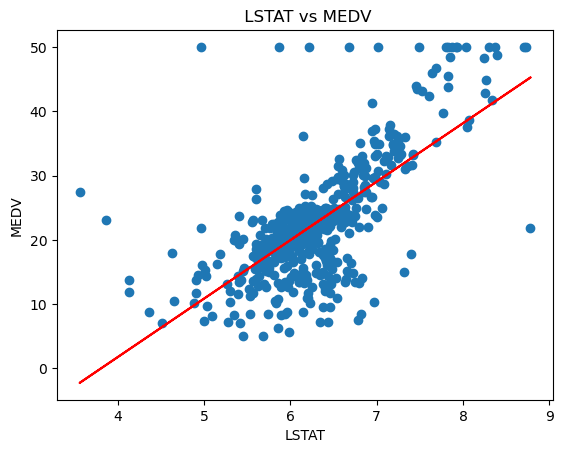

In [38]:
m, b = lm(x,y)               # Calling the lm function
u_pred =x*m+b                # we calculate prediction as u_pred
plt.scatter(x,y)
plt.title(" LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot(x,u_pred, color= 'r')
plt.show

In [39]:
print(mae(y,u_pred)) # call the functin mae to calculate mean absolute error for prediction 'u' after applying the least-square regression method. 
#the mean square error now low. 

4.4477729015322325
